In [1]:
#Dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
#Load csv file
drug_deaths_path = os.path.join("RSdrug_deaths_clean.csv")

#read drug overdose data in 
drug_deaths = pd.read_csv(drug_deaths_path)

print(drug_deaths.shape)
print(drug_deaths.columns)
drug_deaths.head()

(3425, 30)
Index(['Unnamed: 0', 'ID', 'Date', 'DateType', 'Age', 'Sex', 'Race',
       'ResidenceCity', 'ResidenceCounty', 'ResidenceState', 'DeathCity',
       'InjuryState', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue',
       'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
       'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone',
       'Other', 'OpiateNOS', 'AnyOpioid', 'DeathCityGeo'],
      dtype='object')


,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCityGeo
0,2,16-0165,3/13/16 0:00,0,30,Female,White,SANDY HOOK,FAIRFIELD,CT,...,0,0,0,0,0,0,NaN,0,1,"Danbury, CT\n(41.393666, -73.451539)"
1,13,15-0232,5/14/15 0:00,1,50,Male,White,DANBURY,FAIRFIELD,CT,...,0,0,0,0,0,0,NaN,0,1,"DANBURY, CT\n(41.393666, -73.451539)"
2,14,16-0028,1/13/16 0:00,0,29,Male,Black,NEW HAVEN,NEW HAVEN,CT,...,1,0,1,0,0,0,NaN,0,1,"NEW HAVEN, CT\n(41.308252, -72.924161)"
3,18,16-0065,1/30/16 0:00,0,54,Male,White,MIDDLETOWN,MIDDLESEX,CT,...,0,0,0,0,0,0,NaN,0,1,"MIDDLETOWN, CT\n(41.544654, -72.651713)"
4,19,16-0889,12/20/16 0:00,0,32,Male,White,WINDHAM,WINDHAM,CT,...,1,0,0,0,0,0,NaN,0,1,"Windham, CT\n(41.699744, -72.157703)"


In [3]:
fent_cols = ["Age", "Fentanyl", "Fentanyl_Analogue"]
drug_deaths[fent_cols].head()

,Age,Fentanyl,Fentanyl_Analogue
0,30,0,0
1,50,0,0
2,29,0,0
3,54,0,0
4,32,1,0


In [4]:
drug_deaths["Fentanyl"].value_counts()

1    1933
0    1492
Name: Fentanyl, dtype: int64

In [5]:
age_df = drug_deaths.groupby("Age").count()
age_df["Age"] = age_df.index

Text(0.5, 1.0, 'Age vs. Fentanyl Overdoses')

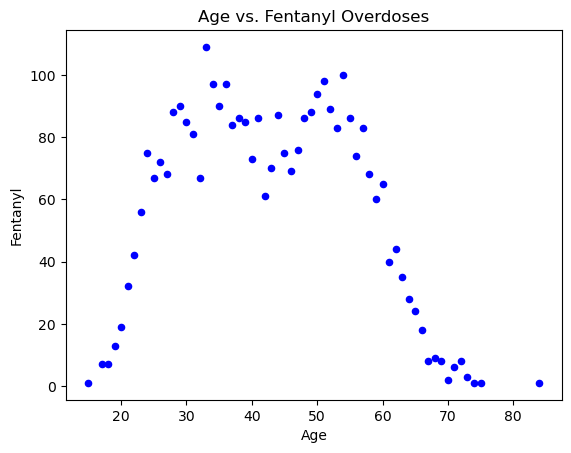

In [9]:
age_df.plot(kind="scatter", x="Age", y="Fentanyl", color="blue")
plt.title("Age vs. Fentanyl Overdoses")